## 4.2 손실함수

### 4.2.1 평균 제곱 오차

In [1]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [2]:
t=np.array([0,0,1,0,0,0,0,0,0,0])
y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

In [3]:
mean_squared_error(y,t)

0.09750000000000003

In [4]:
y=np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

In [5]:
mean_squared_error(y,t)

0.5975

### 4.2.2 교차 엔트로피 오차

In [6]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [7]:
t=np.array([0,0,1,0,0,0,0,0,0,0])
y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

In [8]:
cross_entropy_error(y,t)

0.510825457099338

In [9]:
y=np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])

In [10]:
cross_entropy_error(y,t)

2.302584092994546

In [11]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [14]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
batch_mask

array([20986, 59429, 45154, 33394,  6286, 42646, 26287, 27633, 49947,
       33723])

In [15]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [16]:
# 정답 레이블이 one-hot으로 인코딩되어있을때
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

# 정답 레이블이 숫자 레이블로 주어졌을때
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

## 4.3 수치 미분

### 4.3.1 미분

In [17]:
# 나쁜 구현 예
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h

In [18]:
# 오차 문제를 개선한 예
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [19]:
def function1(x):
    return 0.01*x**2+0.1*x

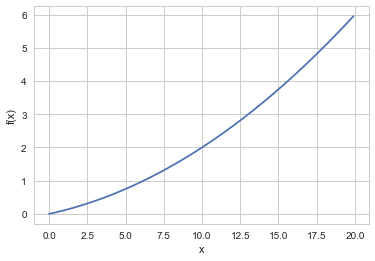

In [20]:
x=np.arange(0.0,20.0,0.1)
y=function1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [21]:
numerical_diff(function1,5)

0.1999999999990898

In [22]:
numerical_diff(function1,10)

0.2999999999986347

### 4.3.3 편미분

In [23]:
def function2(x):
#     return x[0]**2+x[1]**2
    return np.sum(x**2)

## 4.4 기울기

- `기울기`: 모든 변수의 편미분을 벡터로 정리한것

In [24]:
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val=x[idx]
        
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/2*h
        x[idx]=tmp_val
        
    return grad

In [25]:
numerical_gradient(function2, np.array([3.,4.]))

array([6.e-08, 8.e-08])

In [26]:
numerical_gradient(function2, np.array([0.,2.]))

array([0.e+00, 4.e-08])

In [27]:
numerical_gradient(function2, np.array([3.,0.]))

array([6.e-08, 0.e+00])

### 4.4.1 경사하강법

In [28]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x=init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x-=lr*grad
    return x

In [29]:
def function2(x):
    return x[0]**2 + x[1]**2

In [30]:
init_x = np.array([-3.0, 4.0])

In [31]:
gradient_descent(function2, init_x=init_x, lr=0.1, step_num=100)

array([-2.9999994,  3.9999992])

### 4.4.2 신경망에서의 기울기

In [32]:
from common.functions import softmax # 분류문제 활성화 함수
from common.functions import cross_entropy_error # 손실함수
from common.gradient import numerical_gradient

In [33]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        return loss

In [34]:
net=simpleNet()
print(net.W)

[[ 1.42675684 -0.97132479  2.61483683]
 [ 0.59844292  0.38747556 -0.66396218]]


In [35]:
x=np.array([0.6,0.9])
p=net.predict(x)
p

array([ 1.39465273, -0.23406688,  0.97133613])

In [36]:
np.argmax(p)

0

In [37]:
t=np.array([0,0,1])
net.loss(x,t)

1.039070372434278

In [38]:
t=np.array([0,1,0])
net.loss(x,t)

2.2444727189832814

In [39]:
t=np.array([1,0,0])
net.loss(x,t)

0.615753871075179

In [40]:
# def f(W):
#     return net.loss(x,t)

f = lambda w:net.loss(x,t)

dW=numerical_gradient(f, net.W)
dW

array([[-0.27585992,  0.06358997,  0.21226995],
       [-0.41378989,  0.09538496,  0.31840493]])

### 4.5.1 2층 신경망 클래스 구현하기

In [41]:
from common import *
from common.gradient import numerical_gradient

In [46]:
from ch03_신경망.sigmoid import sigmoid

In [47]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, outputsize, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, outputsize)
        self.params['b2'] = np.zeros(outputsize)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2)+b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W:self.loss(x,t)
        
        grads={}
        grads['W1']=numerical_gradient(loss_W, self.params['W1'])
        grads['b1']=numerical_gradient(loss_W, self.params['b1'])        
        grads['W2']=numerical_gradient(loss_W, self.params['W2'])        
        grads['b2']=numerical_gradient(loss_W, self.params['b2'])        
        return grads

In [48]:
net = TwoLayerNet(input_size=784, hidden_size=100, outputsize=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [49]:
x=np.random.rand(100,784)
t=net.predict(x)

In [50]:
%time grads=net.numerical_gradient(x,t)

CPU times: user 1min 26s, sys: 519 ms, total: 1min 26s
Wall time: 1min 27s


In [52]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 훈련하기

In [54]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [55]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [56]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [57]:
iters_num = 10000 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

In [58]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [62]:
# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획등
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능개선 
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.9487333333333333, 0.9471
train acc, test acc | 0.94975, 0.9482
train acc, test acc | 0.9514666666666667, 0.9489
train acc, test acc | 0.9527166666666667, 0.9501
train acc, test acc | 0.9538, 0.9506
train acc, test acc | 0.95525, 0.9514
train acc, test acc | 0.9563666666666667, 0.9534
train acc, test acc | 0.9571, 0.9534
train acc, test acc | 0.9582666666666667, 0.956
train acc, test acc | 0.9593333333333334, 0.9557
train acc, test acc | 0.95935, 0.9546
train acc, test acc | 0.9603, 0.9558
train acc, test acc | 0.9615333333333334, 0.9577
train acc, test acc | 0.9618666666666666, 0.9568
train acc, test acc | 0.9631, 0.9582
train acc, test acc | 0.96365, 0.9581
train acc, test acc | 0.9642166666666667, 0.9587


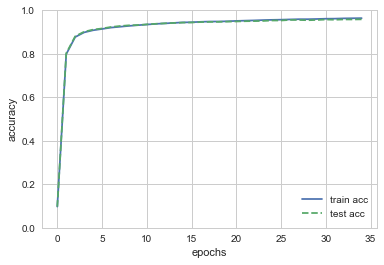

In [63]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()